### Лабораторна робота №3

з дисципліни "Нейронні мережі"

студента групи АнД-41

Морозова Ростислава
Варіант - 9

Завдання
На основі документу вирішити завдання класифікації для набору даних Fashion MNIST.

Для моделювання використати 3 класи індекси яких взяти відповідно до номеру у списку групи у наведеній нижче таблиці.

Моделювання провести із використанням нейронної мережі (Flatten & Dense layers).

Здійснити вибір оптимального кроку градієнтного алгоритму (learning_rate), а також побудову Confusion Matrix.

Результати оформити у вигляді файлу з кодом для моделювання та візуалізації у форматі .ipynb

Результати викласти у репозиторії GitHub (папка Lab3).

Підготуватися до захисту лабораторрної роботи (пояснення коду, відповіді на запитання за темою)

Індекси за варіантом: 8,1,5

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import metrics
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [3]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()
idx = np.argsort(train_labels)
train_data = train_data[idx]
train_labels = train_labels[idx]

idx = np.argsort(test_labels)
test_data = test_data[idx]
test_labels = test_labels[idx]

labels = ["T-Shirt", "Trouser", "Pullover", "Dress", "Coat", 
          "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

label_mapping = dict(zip(labels, range(10)))

def get_data(mapping, classes):
    X_train, X_test, y_train, y_test = [], [], [], []
    for cls in classes:
        idx = mapping[cls]
        start = idx*6000
        end = idx*6000+6000
        X_train.append(train_data[start: end])
        y_train.append(train_labels[start: end])
        start = idx*1000
        end = idx*1000+1000
        X_test.append(test_data[start: end])
        y_test.append(test_labels[start: end])
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = get_data(label_mapping, 
                                            classes=["Bag", "Trouser", "Sandal"])

In [4]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
X_train = X_train.reshape(18000,784)
X_test = X_test.reshape(3000,784)
y_train = y_train.reshape(18000,1)
y_test = y_test.reshape(3000,1)

In [7]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(9, activation="softmax")
])

# Compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
history = model.fit(X_train, y_train, epochs=50,validation_data=( X_test, y_test))

Epoch 1/50
563/563 [==============================] - 1s 2ms/step - loss: 3.7180 - accuracy: 0.5833 - val_loss: 0.9054 - val_accuracy: 0.8277
Epoch 2/50
563/563 [==============================] - 1s 2ms/step - loss: 0.7652 - accuracy: 0.8035 - val_loss: 0.6680 - val_accuracy: 0.8580
Epoch 3/50
563/563 [==============================] - 1s 2ms/step - loss: 0.5976 - accuracy: 0.8754 - val_loss: 0.6995 - val_accuracy: 0.8520
Epoch 4/50
563/563 [==============================] - 1s 2ms/step - loss: 0.5414 - accuracy: 0.8915 - val_loss: 0.5623 - val_accuracy: 0.9163
Epoch 5/50
563/563 [==============================] - 1s 2ms/step - loss: 0.4370 - accuracy: 0.9166 - val_loss: 0.5311 - val_accuracy: 0.9077
Epoch 6/50
563/563 [==============================] - 1s 2ms/step - loss: 0.3888 - accuracy: 0.9246 - val_loss: 0.5269 - val_accuracy: 0.8583
Epoch 7/50
563/563 [==============================] - 1s 1ms/step - loss: 0.3644 - accuracy: 0.9259 - val_loss: 0.3793 - val_accuracy: 0.9397
Epoch 

In [8]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(9, activation="softmax")
])

# Compile the model
model2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))
# traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

# Fit the model
history2 = model2.fit(X_train, y_train, epochs=50,validation_data=( X_test, y_test),callbacks=[lr_scheduler])

Epoch 1/50
563/563 [==============================] - 1s 2ms/step - loss: 3.7180 - accuracy: 0.5833 - val_loss: 0.9054 - val_accuracy: 0.8277
Epoch 2/50
563/563 [==============================] - 1s 2ms/step - loss: 0.7748 - accuracy: 0.8085 - val_loss: 0.6752 - val_accuracy: 0.7870
Epoch 3/50
563/563 [==============================] - 1s 2ms/step - loss: 0.6088 - accuracy: 0.8739 - val_loss: 0.7205 - val_accuracy: 0.8773
Epoch 4/50
563/563 [==============================] - 1s 1ms/step - loss: 0.5193 - accuracy: 0.8918 - val_loss: 0.4963 - val_accuracy: 0.9037
Epoch 5/50
563/563 [==============================] - 1s 1ms/step - loss: 0.4533 - accuracy: 0.9076 - val_loss: 0.5316 - val_accuracy: 0.8857
Epoch 6/50
563/563 [==============================] - 1s 2ms/step - loss: 0.4050 - accuracy: 0.9278 - val_loss: 0.5353 - val_accuracy: 0.8497
Epoch 7/50
563/563 [==============================] - 1s 1ms/step - loss: 0.3255 - accuracy: 0.9326 - val_loss: 0.3888 - val_accuracy: 0.9223
Epoch 

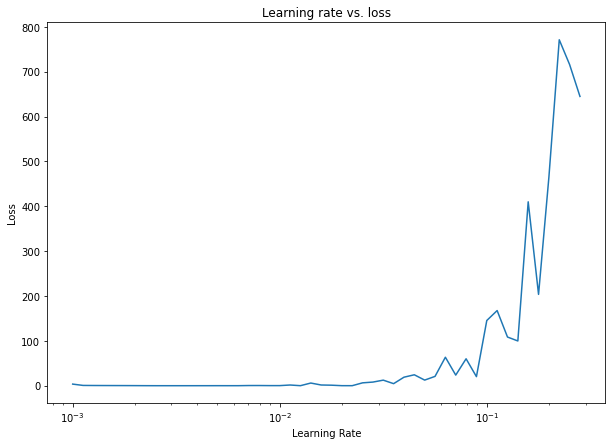

In [9]:
# Plot the learning rate versus the loss
lrs = 1e-3 * (10**(np.arange(50)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history2.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

In [10]:
tf.random.set_seed(42)

# Create the model
model3 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(9, activation="softmax")
])

# Compile the model
model3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
                 metrics=["accuracy"])

# Fit the model
history3 = model3.fit(X_train, y_train, epochs=50,validation_data=( X_test, y_test))

Epoch 1/50
563/563 [==============================] - 1s 2ms/step - loss: 3.7180 - accuracy: 0.5833 - val_loss: 0.9054 - val_accuracy: 0.8277
Epoch 2/50
563/563 [==============================] - 1s 2ms/step - loss: 0.7652 - accuracy: 0.8035 - val_loss: 0.6680 - val_accuracy: 0.8580
Epoch 3/50
563/563 [==============================] - 1s 2ms/step - loss: 0.5976 - accuracy: 0.8754 - val_loss: 0.6995 - val_accuracy: 0.8520
Epoch 4/50
563/563 [==============================] - 1s 1ms/step - loss: 0.5414 - accuracy: 0.8915 - val_loss: 0.5623 - val_accuracy: 0.9163
Epoch 5/50
563/563 [==============================] - 1s 1ms/step - loss: 0.4370 - accuracy: 0.9166 - val_loss: 0.5311 - val_accuracy: 0.9077
Epoch 6/50
563/563 [==============================] - 1s 1ms/step - loss: 0.3888 - accuracy: 0.9246 - val_loss: 0.5269 - val_accuracy: 0.8583
Epoch 7/50
563/563 [==============================] - 1s 1ms/step - loss: 0.3644 - accuracy: 0.9259 - val_loss: 0.3793 - val_accuracy: 0.9397
Epoch 

In [12]:
y_prob = model.predict(X_test)
y_hat = y_prob.argmax(axis=1)

In [13]:
conf_matrix=metrics.confusion_matrix(y_test,y_hat)
conf_matrix = pd.DataFrame(conf_matrix, index=["Bag", "Trouser", "Sandal"], columns=["Bag", "Trouser", "Sandal"])
conf_matrix

,Bag,Trouser,Sandal
Bag,978,5,17
Trouser,15,984,1
Sandal,100,6,894
